In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:43:01 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:43:01 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:43:01 INFO: Setting time scale factor to 1.0.
2019-05-17 14:43:01 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:43:01 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:43:01 INFO: Starting execution process
2019-05-17 14:43:06 INFO: Time 0:00:03.876343 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:43:17 INFO: Time 0:00:11.250749 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:25 INFO: Time 0:00:07.382365 taken by PartitionAndPlacePartitioner
Created spalloc job 4642685
2019-05-17 14:43:25 INFO: Created spalloc job 4642685
Waiting for board power commands to complete.
2019-05-17 14:43:25 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:32 INFO: Time 0:00:07.169874 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:44 INFO: Time 0:00:00.027554 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:44 INFO: Time 0:00:00.056214 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:44 INFO: Time 0:00:00.155780 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:44 INFO: Time 0:00:00.542955 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:44 INFO: Time 0:00:00.053143 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:46 INFO: Time 0:00:01.443206 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([2.7000e+01, 1.2030e+03, 1.7270e+03, 2.0640e+03, 3.4960e+03,
       4.8370e+03, 4.9300e+03, 7.8110e+03, 8.0730e+03, 9.6950e+03,
       1.1382e+04, 1.3418e+04, 1.4108e+04, 1.4220e+04, 1.6222e+04,
       1.7001e+04, 1.7712e+04, 1.8199e+04, 1.8257e+04, 1.8282e+04,
       1.8555e+04, 1.8596e+04, 1.9009e+04, 1.9917e+04, 2.1841e+04,
       2.5362e+04, 2.6283e+04, 2.6360e+04, 2.6840e+04, 2.6982e+04,
       2.8217e+04, 2.9519e+04, 3.2261e+04, 3.2325e+04, 3.3107e+04,
       3.3406e+04, 3.4217e+04, 3.4273e+04, 3.5371e+04, 3.5653e+04,
       3.6350e+04, 3.6747e+04, 3.9360e+04, 3.9753e+04, 3.9832e+04,
       3.9917e+04, 4.2113e+04, 4.2966e+04, 4.4344e+04, 4.5700e+04,
       4.7596e+04, 4.7995e+04, 5.2321e+04, 5.3032e+04, 5.5468e+04,
       5.5609e+04, 5.6005e+04, 5.6335e+04, 5.7516e+04, 5.8976e+04,
       6.1290e+04, 6.1514e+04, 6.4131e+04, 6.8473e+04, 6.9117e+04,
       6.9192e+04, 7.0112e+04, 7.1024e+04, 7.2370e+04, 7.2538e+04,
       7.2577e+04, 7.3220e+04, 7.3289e+04, 7.3663

## Plot:

<IPython.core.display.Javascript object>


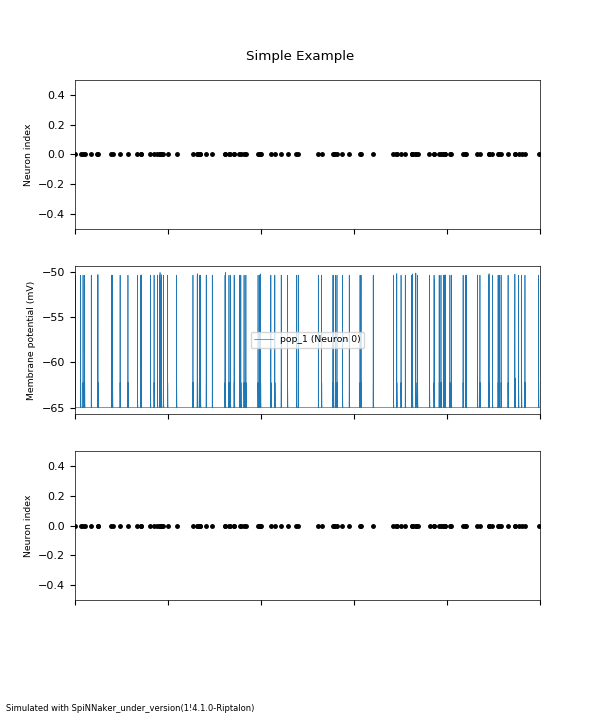

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()